<a href="https://colab.research.google.com/github/YASHGARG7004/Ml-project/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Failure Prediction Objecive
The objective of this project is to develop a predictive model for heart failure diagnosis using patient data. Heart failure (HF) is a serious condition where the heart is unable to pump blood effectively, leading to severe complications and high mortality rates. Early and accurate prediction of heart failure can greatly improve treatment outcomes and survival rates.


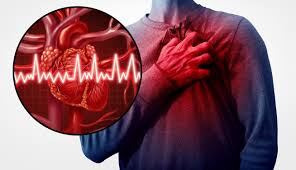

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv")
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Explore Data

In [3]:
data.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
data.describe(include='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [6]:
data.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


# Analysis

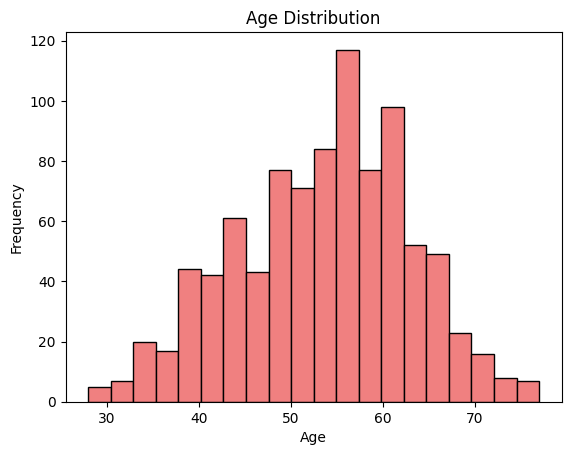

In [11]:
import matplotlib.pyplot as plt

# Replace 'data' with your actual DataFrame and 'Age' with the correct column name
age_data = data['Age']

# Creating the histogram
plt.hist(age_data, bins=20, color='lightcoral', edgecolor='black')

# Adding title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()


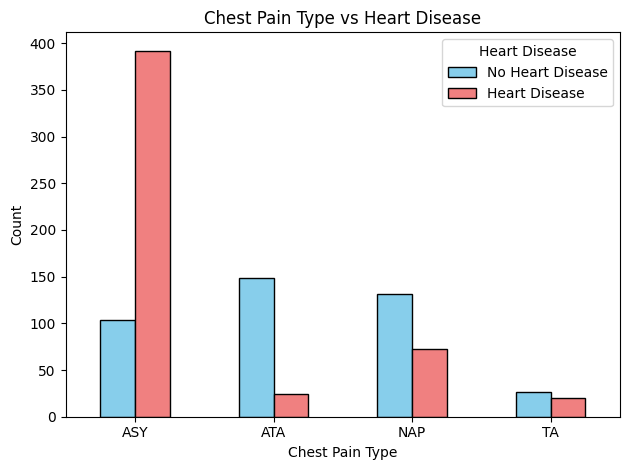

In [13]:
import matplotlib.pyplot as plt

grouped_data = data.groupby(['ChestPainType', 'HeartDisease']).size().unstack()

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Adding labels and title
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


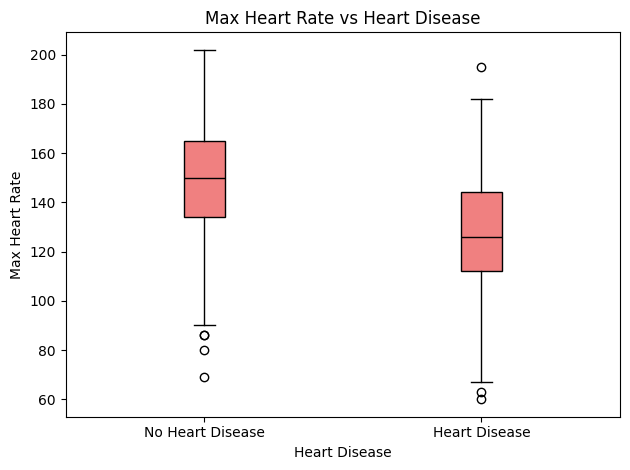

In [15]:

# Create the box plot for 'MaxHR' grouped by 'HeartDisease' (0 and 1)
heart_disease_0 = data[data['HeartDisease'] == 0]['MaxHR']
heart_disease_1 = data[data['HeartDisease'] == 1]['MaxHR']

# Creating the box plot
plt.boxplot([heart_disease_0, heart_disease_1], patch_artist=True,
            boxprops=dict(facecolor='lightcoral', color='black'),
            medianprops=dict(color='black'))

# Adding title and labels
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate')

# Setting the x-axis labels
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])

# Display the plot
plt.tight_layout()
plt.show()


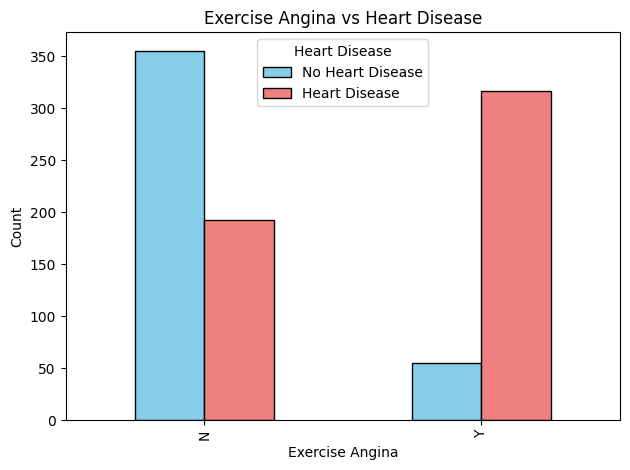

In [17]:
import matplotlib.pyplot as plt

# Example: Replace 'data' with your actual DataFrame
# Grouping the data based on 'ExerciseAngina' and 'HeartDisease'
counts = data.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack(fill_value=0)

# Create a bar chart
counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Adding title and axis labels
plt.title('Exercise Angina vs Heart Disease')
plt.xlabel('Exercise Angina')
plt.ylabel('Count')

# Adding a legend
plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Display the plot
plt.tight_layout()
plt.show()


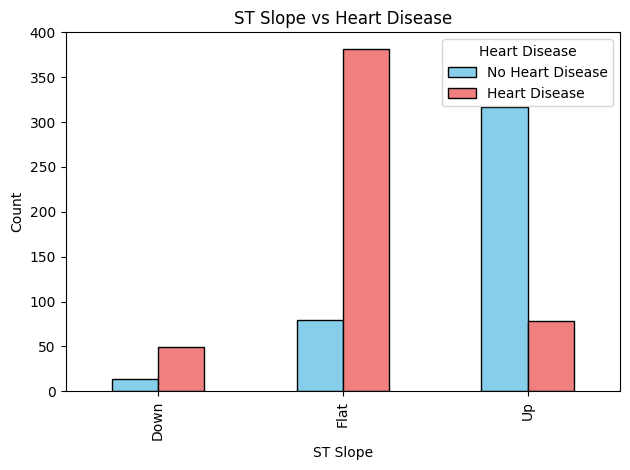

In [18]:

# Grouping the data by 'ST_Slope' and 'HeartDisease'
counts = data.groupby(['ST_Slope', 'HeartDisease']).size().unstack(fill_value=0)

# Create a bar chart
counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Adding title and axis labels
plt.title('ST Slope vs Heart Disease')
plt.xlabel('ST Slope')
plt.ylabel('Count')

# Adding a legend
plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Display the plot
plt.tight_layout()
plt.show()


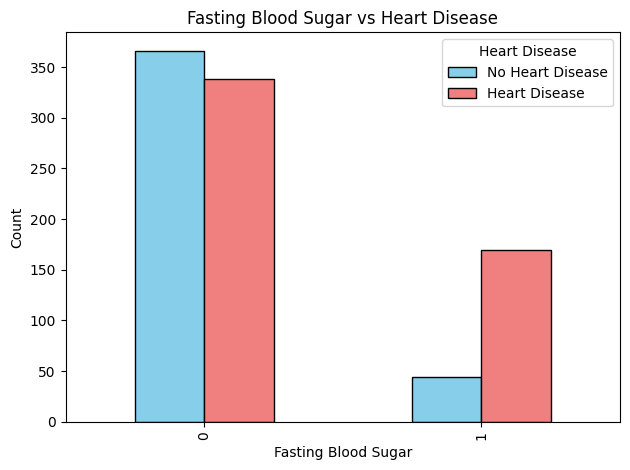

In [19]:

# Grouping the data by 'FastingBS' and 'HeartDisease'
counts = data.groupby(['FastingBS', 'HeartDisease']).size().unstack(fill_value=0)

# Create a bar chart
counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')

# Adding title and axis labels
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')

# Adding a legend
plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease')

# Display the plot
plt.tight_layout()
plt.show()


# Feature Engineering

In [20]:
lbl=LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for col in categorical_columns:
    data[col] = lbl.fit_transform(data[col])

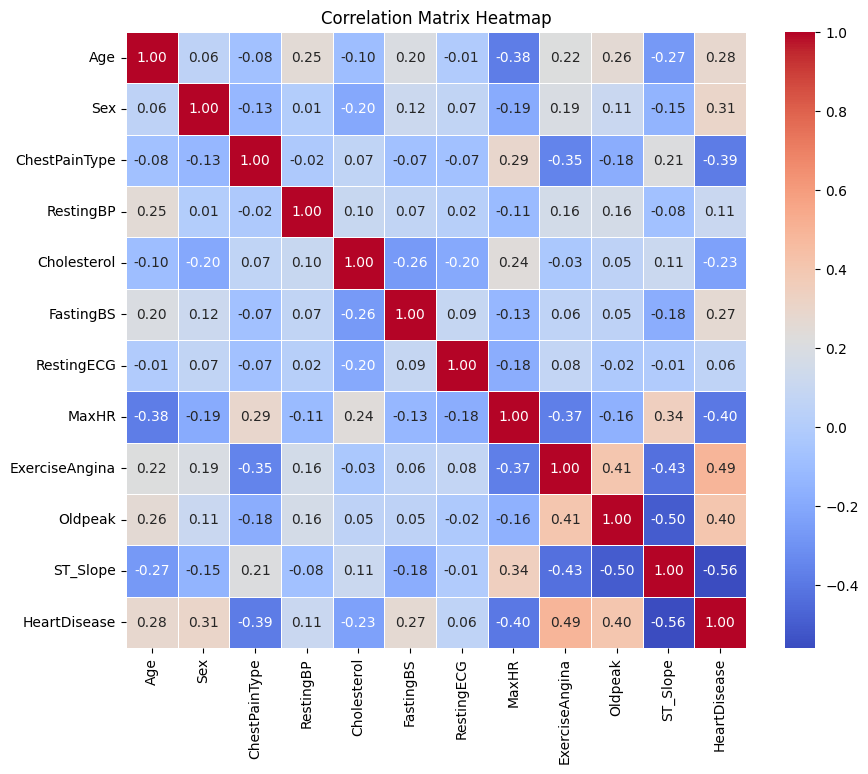

In [21]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
data.corr()['HeartDisease'].sort_values(ascending=False)

,HeartDisease
HeartDisease,1.000000
ExerciseAngina,0.494282
Oldpeak,0.403951
Sex,0.305445
Age,0.282039
FastingBS,0.267291
RestingBP,0.107589
RestingECG,0.057384
Cholesterol,-0.232741
ChestPainType,-0.386828


# Model

In [23]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

In [24]:
scaler_mas = StandardScaler()
for col in X.columns:
    scaler_mas.fit(X[[col]])
    X[col] = scaler_mas.transform (X[[col]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

# Logistic Regression

In [26]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_predtest= lr.predict(X_test)
y_predtrain=lr.predict(X_train)

In [28]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train, y_predtrain)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predtest)*100:.2f}")


Accuracy Score:
Train Accuracy: 86.10
Test Accuracy: 84.78


In [29]:
print("\nRecall Score:")
print(f"Train Recall: {recall_score(y_train, y_predtrain)}")
print(f"Test Recall: {recall_score(y_test, y_predtest)}")


Recall Score:
Train Recall: 0.8902743142144638
Test Recall: 0.822429906542056


In [30]:
print("\nClassification Report (Test):")
print(classification_report(y_test, y_predtest))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [31]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predtest))

Confusion Matrix (Test):
[[68  9]
 [19 88]]


# KFold

In [32]:
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

In [33]:
model = RandomForestClassifier(n_estimators=100 , criterion = "entropy" , max_depth= 4 ,random_state= 0)
scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())
model.fit(X_train, y_train)

Cross-validation scores: [0.86956522 0.88586957 0.88043478 0.82513661 0.84699454]
Mean accuracy: 86.1600142551675
Standard deviation: 0.02258363910132184


RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [34]:
y_predTest=model.predict(X_test)
y_predTrain=model.predict(X_train)

In [35]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train, y_predTrain)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)*100:.2f}")


Accuracy Score:
Train Accuracy: 89.24
Test Accuracy: 85.87


In [36]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[67 10]
 [16 91]]


# Support Vector Machine

In [37]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C=3, random_state = 42)
svc.fit(X_train, y_train)

SVC(C=3, kernel='linear', random_state=42)

In [38]:
y_predtest= lr.predict(X_test)
y_predtrain=lr.predict(X_train)

In [39]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train, y_predtrain)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predtest)*100:.2f}")


Accuracy Score:
Train Accuracy: 86.10
Test Accuracy: 84.78


In [40]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predtest))

Confusion Matrix (Test):
[[68  9]
 [19 88]]
